In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [11]:
columns = ["Q2","W","g1","g1_stat","g1_sys","A1_F1","AF_stat","AF_sys"]

data = pd.read_csv("EG4_proton_g1data_4np.csv",names=columns)

data["X"] = data.Q2/(data.W**2 - 0.938272**2 + data.Q2)
data.head()

,Q2,W,g1,g1_stat,g1_sys,A1_F1,AF_stat,AF_sys,X
0,0.012,1.11,0.1153,0.0898,0.0133,0.1448,0.1203,0.0172,0.032990
1,0.012,1.13,-0.0852,0.1148,0.0212,-0.1189,0.1441,0.0262,0.029372
2,0.012,1.15,-0.1076,0.1197,0.0215,-0.1458,0.1438,0.0272,0.026423
3,0.012,1.17,-0.2045,0.1168,0.0208,-0.2479,0.1368,0.0270,0.023974
4,0.012,1.19,-0.7447,0.1360,0.0381,-0.8537,0.1554,0.0472,0.021908


In [12]:
np.unique(data.X)

array([0.009284  , 0.00953366, 0.00972333, ..., 0.66704804, 0.67962267,
       0.70514528])

columns = ["Q2","W","g1","g1_stat","g1_sys","A1_F1","AF_stat","AF_sys"]

data_deu = pd.read_csv("g1D_Data.csv",skiprows=1,names=columns)
#X = Q2 / (W^2 - M^2 + Q^2)
data_deu["X"] = data_deu.Q2/(data_deu.W**2 - 0.939**2 + data_deu.Q2)

data_deu.head()

In [13]:
columns = ["Q2","W2","X","F1","F2","R","A1","A2","G1","G2"]#,"g1_error"]

smear_data = pd.read_csv("f1.out", delimiter="   ", names=columns, engine="python")
smear_data["W"]=np.sqrt(smear_data["W2"])
smear_data.head()

,Q2,W2,X,F1,F2,R,A1,A2,G1,G2,W
0,0.012,1.2769,0.029471,0.781689,0.045517,0.240092,-0.480709,-0.074963,-0.322935,0.206956,1.13
1,0.012,1.3225,0.026503,0.832607,0.044075,0.204853,-0.419444,-0.039615,-0.301894,0.229301,1.15
2,0.012,1.3689,0.024039,1.019044,0.048368,0.154888,-0.430705,-0.022306,-0.383191,0.328035,1.17
3,0.012,1.4161,0.021963,1.256881,0.054273,0.122415,-0.462041,-0.016778,-0.515577,0.459570,1.19
4,0.012,1.4641,0.020189,1.413461,0.056473,0.108013,-0.447075,-0.013362,-0.570157,0.515590,1.21


In [14]:
pd.unique(data.Q2)

array([0.012 , 0.0143, 0.0171, 0.0204, 0.0244, 0.029 , 0.0347, 0.0414,
       0.0494, 0.059 , 0.0705, 0.0841, 0.1005, 0.12  , 0.143 , 0.1708,
       0.2042, 0.2436, 0.2904, 0.3466, 0.4139, 0.494 , 0.5902, 0.7047,
       0.8412])

pd.unique(data_deu.Q2)

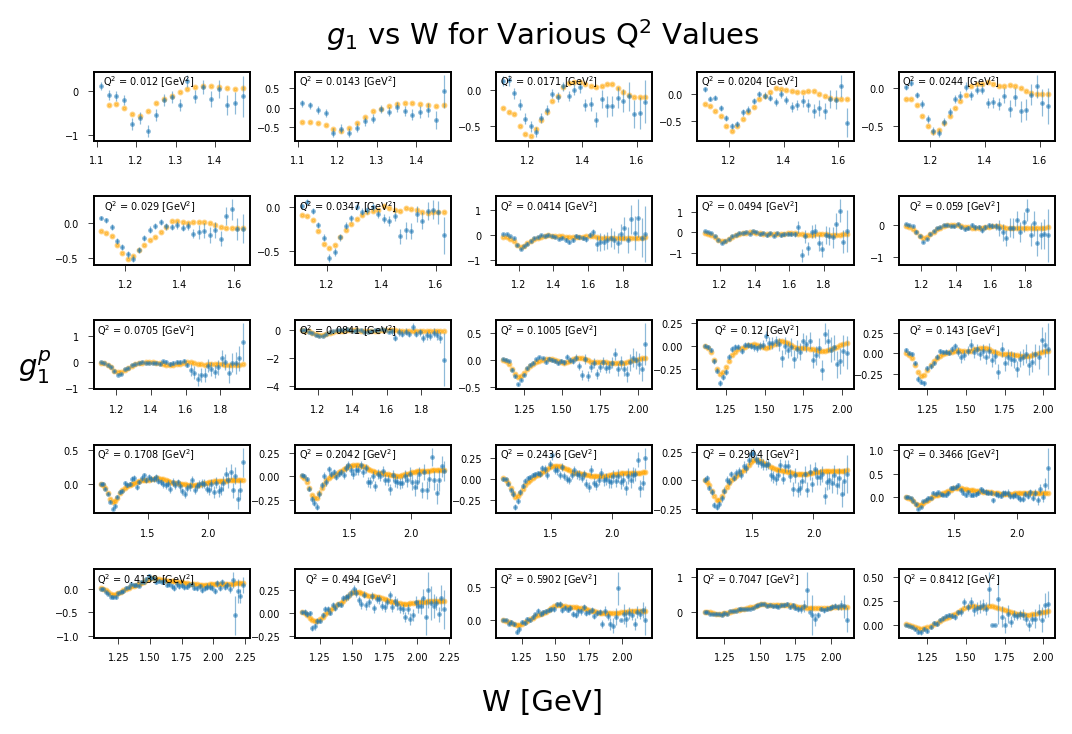

In [15]:
##Set Up Figure
fig, axs = plt.subplots(5, 5, sharex=False, sharey=False, dpi=175)
fig.suptitle("$g_1$ vs W for Various Q$^2$ Values", y=1)
fig.supxlabel("W [GeV]", y=0)
fig.supylabel("$g_1^p$", x=0, rotation="horizontal")

##Get Q2 Values
Q2_Vals = pd.unique(data.Q2)
plt.tight_layout(pad=0.2)

##Loop Over Axes
for i in range(5):
    for j in range(5):
        bin_num = 5*i + j
        
        selected = data[data.Q2==Q2_Vals[bin_num]]
        #selected_deu = data_deu[data_deu.Q2==Q2_Vals[5*i+j]]
        selected_smear = smear_data[smear_data.Q2==Q2_Vals[bin_num]]
            
        axs[i,j].errorbar(selected.W, selected.g1, yerr=selected.g1_stat, ms=1, fmt="o", elinewidth=0.5, alpha=0.5)
        axs[i,j].scatter(selected_smear.W, selected_smear.G1, s=2, color="orange", alpha=0.5)

        axs[i,j].annotate(f"Q$^2$ = {Q2_Vals[bin_num]} [GeV$^2$]", xy=(0.65, 0.97), xycoords='axes fraction', 
                          size=4, ha='right', va='top')
        
        #Tick Formatting
        axs[i,j].tick_params(axis="both", which="major", labelsize=4, width=0.3, length=2.5)
        axs[i,j].tick_params(axis="both", which="minor", labelsize=4, width=0.3, length=1.75)
        


#Plot Output
#Adjust Output

#Save Plot
#plt.savefig("Test_Plot.png")


In [7]:
##Get Data
pro_columns = ["Q2","W","g1","g1_stat","g1_sys","A1_F1","AF_stat","AF_sys"]
pro_data = pd.read_csv("EG4_proton_g1data_4np.csv",skiprows=1, names=pro_columns)
pro_data["X"] = pro_data.Q2/(pro_data.W**2 - 0.939**2 + pro_data.Q2)

"""deu_columns = ["Q2","W","g1","g1_stat","g1_sys","A1_F1","AF_stat","AF_sys"]
data_deu = pd.read_csv("g1D_Data.csv",skiprows=1,names=deu_columns)
data_deu["X"] = data_deu.Q2/(data_deu.W**2 - 0.939**2 + data_deu.Q2)"""


smear_columns = ["Q2","W2","X","F1","F2","R","A1","A2","g1","g2"]
smear_data = pd.read_csv("f1.out",delimiter="   ", names=smear_columns)
smear_data["W"]=np.sqrt(smear_data["W2"])


/tmp/ipykernel_1593/4066104723.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  smear_data = pd.read_csv("f1.out",delimiter="   ", names=smear_columns)


In [8]:
from ROOT import *

Welcome to JupyROOT 6.24/02


Info in <TCanvas::Print>: pdf file Proton_g1_Data_Smear.pdf has been created


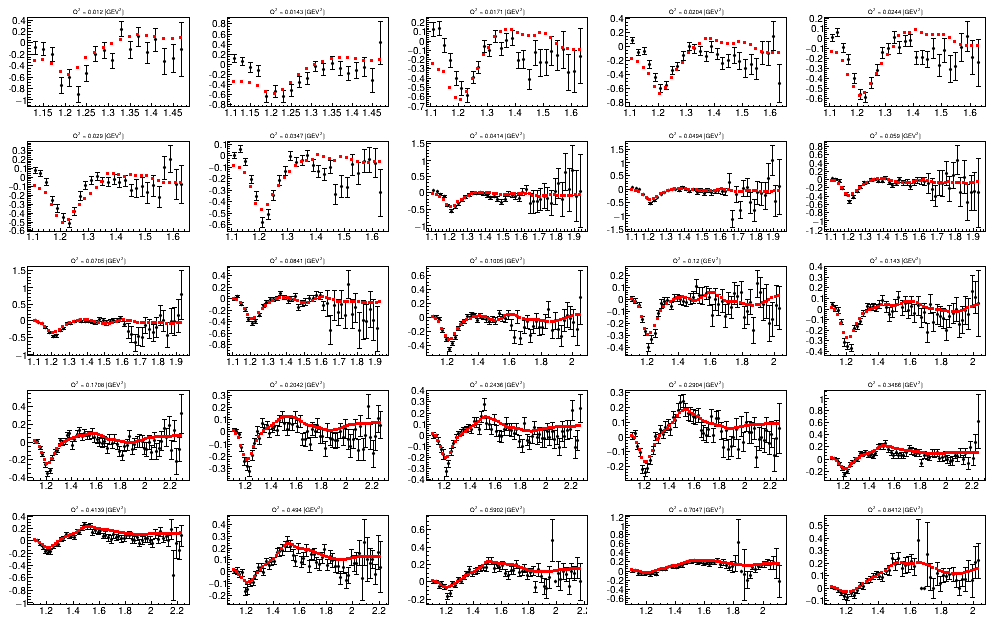

In [9]:
##Plotting
Canvas = TCanvas("Canvas","Proton g1 Plot", 0, 0, 1000, 650)
Canvas.Divide(5,5)
colors = [1,2,46,41,6,4,28,30,9,12]
markers = [20,21,22,23,24,25,26,28]

#Get Q2 Values
Q2_Vals = pd.unique(pro_data.Q2)

#MultiGraph List
TMultiGraphs = []

#Loop Over Axes
for i in range(5):    
    for j in range(5):        
        #Select Data
        selected_pro = pro_data[pro_data.Q2==Q2_Vals[5*i+j]]
        selected_smear = smear_data[smear_data.Q2==Q2_Vals[5*i+j]]
        
        #Plot Set-Up
        Canvas.cd(1+5*i+j)
        TMultiGraphs.append(TMultiGraph(f"mg{i*5+j}", f"TMultiGraph{i*5+j}"))
        
        #Add Points
        TGraphs = []
        if i*5+j == 11:
            TGraphs.append(TGraphErrors(len(selected_pro[:-1]), np.array(selected_pro.W[:-1]), np.array(selected_pro.g1[:-1]), np.array(selected_pro.g1_stat[:-1]*0), np.array(selected_pro.g1_stat[:-1])))
            TGraphs.append(TGraphErrors(len(selected_smear), np.array(selected_smear.W), np.array(selected_smear.g1), np.array(selected_smear.g1*0), np.array(selected_smear.g1*0)))

        else:    
            TGraphs.append(TGraphErrors(len(selected_pro), np.array(selected_pro.W), np.array(selected_pro.g1), np.array(selected_pro.g1_stat*0), np.array(selected_pro.g1_stat)))
            TGraphs.append(TGraphErrors(len(selected_smear), np.array(selected_smear.W), np.array(selected_smear.g1), np.array(selected_smear.g1*0), np.array(selected_smear.g1*0)))

        #Plot Points
        for k in [0,1]:       
            TGraphs[k].SetMarkerColor(colors[k])
            TGraphs[k].SetMarkerStyle(markers[k])
            TGraphs[k].SetLineColor(colors[k])
            TGraphs[k].SetMarkerSize(.40)
            TMultiGraphs[i*5+j].Add(TGraphs[k])
            
        TMultiGraphs[i*5+j].SetTitle("Q^{2} = " + str(Q2_Vals[i*5+j]) + " [GEV^{2}]")
        #TMultiGraphs[i*5+j].Set
        #TMultiGraphs[i*5+j].SetTitleOffset(0)
        TMultiGraphs[i*5+j].GetXaxis().SetLabelSize(0.1)
        TMultiGraphs[i*5+j].GetYaxis().SetLabelSize(0.1)
        
        gPad.SetBottomMargin(0.1)
        gPad.SetLeftMargin(0.1)
        gPad.SetTopMargin(0.1)
        gPad.SetRightMargin(0.001)
              
        TMultiGraphs[i*5+j].Draw("AP")
        
        #A
        
        
        #Axis Limit Changes
        """if i*5+j == 11:
            print("Hello")
            gPad.Modified()
            TMultiGraphs[i*5+j].GetHistogram().GetYaxis().SetLimits(1,2)
            TGraphs[0].GetHistogram().GetYaxis().SetLimits(1,2)
            TGraphs[0].GetXaxis().SetRangeUser(1,2)
            TGraphs[1].GetXaxis().SetRangeUser(1,2)
            TGraphs[0].SetLineColor(colors[k+3])"""
        
        
#Plot
#Fix Title
"""Canvas.cd()
padtitle = TPad("padtitle", "padtitle",0.3,0.9,0.7,.99)
padtitle.Draw()
padtitle.cd()
padtitle.SetFillStyle(0)

tex = TLatex(0.5,1,"Title")
tex.SetTextAlign(22)
tex.SetTextSize(0.5)
tex.Draw()"""

#TMultiGraphs[11].GetYaxis().SetRange(-1,1)

Canvas.Update()

Canvas.Draw()
Canvas.SaveAs("Proton_g1_Data_Smear.pdf")

In [16]:
check_data = pro_data[pro_data.Q2==Q2_Vals[-3]]
mu = np.mean(check_data.g1)
Sigma = np.std(check_data.g1)

check_data["sigma"] = ((check_data["g1"]+check_data["g1_stat"])-mu)/Sigma
check_data

/tmp/ipykernel_1593/3209491581.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_data["sigma"] = ((check_data["g1"]+check_data["g1_stat"])-mu)/Sigma


,Q2,W,g1,g1_stat,g1_sys,A1_F1,AF_stat,AF_sys,X,sigma
932,0.5902,1.11,0.0020,0.0179,0.0028,0.0019,0.0600,0.0088,0.627486,-0.568041
933,0.5902,1.13,0.0010,0.0148,0.0151,-0.0046,0.0464,0.0466,0.598957,-0.606269
934,0.5902,1.15,-0.0496,0.0263,0.0133,-0.1501,0.0783,0.0374,0.572466,-0.970839
935,0.5902,1.17,-0.0197,0.0302,0.0056,-0.0445,0.0845,0.0163,0.547811,-0.655687
936,0.5902,1.19,-0.0560,0.0318,0.0061,-0.1209,0.0840,0.0174,0.524819,-0.979231
937,0.5902,1.21,-0.1693,0.0362,0.0111,-0.3951,0.0911,0.0275,0.503335,-1.994618
938,0.5902,1.23,-0.1352,0.0323,0.0098,-0.3082,0.0772,0.0226,0.483224,-1.713032
939,0.5902,1.25,-0.0210,0.0279,0.0097,-0.0527,0.0638,0.0217,0.464366,-0.689253
940,0.5902,1.27,-0.0403,0.0264,0.0098,-0.1100,0.0581,0.0177,0.446655,-0.883193
941,0.5902,1.29,0.0263,0.0261,0.0102,0.0206,0.0551,0.0187,0.429993,-0.265010
